In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import precision_score,recall_score,confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('mnist_train.csv')
X = df.to_numpy()
x = X[:,1:]
Y = X[:,0]

In [3]:
x = preprocessing.normalize(x)

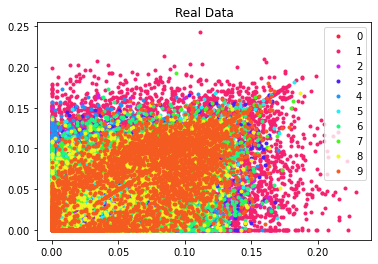

In [10]:
colorlist=["#f5213b","#f5216e","#c821f5","#4821f5","#2195f5","#21eff5","#21f57e","#48f521","#f2f521","#f55b21"]
for k in range(0,10):
    plt.plot(x[Y==k,183],x[Y==k,184],'.',color=colorlist[k],label=str(k))
plt.title("Real Data")
plt.legend()

### DBSCAN

In [5]:
clu=DBSCAN(eps=0.5392,min_samples=7)
clu.fit_predict(x)
y = clu.labels_
print(y.max(),y.min()) 
print(set(y))

9 -1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}


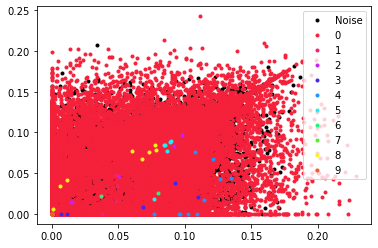

In [11]:
plt.plot(x[y==-1,183],x[y==-1,184],'k.',label="Noise")
for k in range(0,y.max()+1):
    plt.plot(x[y==k,183],x[y==k,184],'.',color=colorlist[k],label=str(k))
plt.legend()

In [12]:
precision = 0
recall = 0
for i in range(0,10):
    precision += precision_score(Y==i,y==i)
    recall += recall_score(Y==i,y==i)  

print("DBScan Precision : {}".format(precision/10))
print("DBScan Recall : {}".format(recall/10))

DBScan Precision : 0.21216201228844572
DBScan Recall : 0.09279618665193648


In [13]:
count=[0,0,0,0,0,0,0,0,0,0]
trainlist=[]
ycheck=list(y==-1)
for i in range(0,60000):
    if ycheck[i] == True:
        count[Y[i]]+=1
        
for k in range(0,10):
    print("Real Data : {} Predcict Data : Noise + CountNum : {}".format(k,count[k]))

Real Data : 0 Predcict Data : Noise + CountNum : 440
Real Data : 1 Predcict Data : Noise + CountNum : 138
Real Data : 2 Predcict Data : Noise + CountNum : 2769
Real Data : 3 Predcict Data : Noise + CountNum : 2190
Real Data : 4 Predcict Data : Noise + CountNum : 1762
Real Data : 5 Predcict Data : Noise + CountNum : 2843
Real Data : 6 Predcict Data : Noise + CountNum : 778
Real Data : 7 Predcict Data : Noise + CountNum : 1014
Real Data : 8 Predcict Data : Noise + CountNum : 2056
Real Data : 9 Predcict Data : Noise + CountNum : 864


In [14]:
trainlist=[]
predictionlist=[]
for j in range(0,10):
    predictionhelp=[]
    trainhelp=[]
    Ycheck=list(Y==j)
    ycheck=list(y==j)
    for i in range(0,60000):
        if Ycheck[i] == True:
            trainhelp.append(i)
        if ycheck[i] == True:
            predictionhelp.append(i)
    trainlist.append(trainhelp)
    predictionlist.append(predictionhelp)

for k in range(0,10):
    trainlist[k]=set(trainlist[k])
    predictionlist[k]=set(predictionlist[k])
    correctnum=trainlist[k].intersection(predictionlist[k])
    print("{} ---> Real Data : {} Predcict Data : {}  - Correct Num : {}".format(k,len(list(trainlist[k])),len(list(predictionlist[k])),len(list(correctnum))))

0 ---> Real Data : 5923 Predcict Data : 45083  - Correct Num : 5483
1 ---> Real Data : 6742 Predcict Data : 5  - Correct Num : 0
2 ---> Real Data : 5958 Predcict Data : 6  - Correct Num : 0
3 ---> Real Data : 6131 Predcict Data : 7  - Correct Num : 7
4 ---> Real Data : 5842 Predcict Data : 10  - Correct Num : 0
5 ---> Real Data : 5421 Predcict Data : 6  - Correct Num : 6
6 ---> Real Data : 5918 Predcict Data : 6  - Correct Num : 0
7 ---> Real Data : 6265 Predcict Data : 7  - Correct Num : 0
8 ---> Real Data : 5851 Predcict Data : 8  - Correct Num : 0
9 ---> Real Data : 5949 Predcict Data : 8  - Correct Num : 0


### K-Means

In [4]:
clu=KMeans(n_clusters=10)
clu.fit_predict(x)
y=clu.labels_

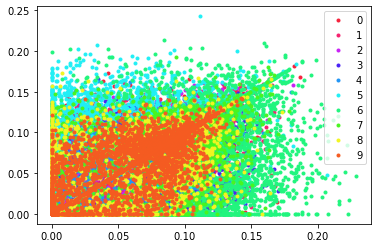

In [6]:
for k in range(0,10):
    plt.plot(x[y==k,183],x[y==k,184],'.',color=colorlist[k],label=str(k))
plt.legend()

In [5]:
precision = 0
recall = 0
for i in range(0,10):
    precision += precision_score(Y==i,y==i)
    recall += recall_score(Y==i,y==i)  

print("K-Means Precision : {}".format(precision/10))
print("K-Means  Recall : {}".format(recall/10))

K-Means Precision : 0.11211482225169785
K-Means  Recall : 0.11834503842561336


In [6]:
trainlist=[]
predictionlist=[]
for j in range(0,10):
    predictionhelp=[]
    trainhelp=[]
    Ycheck=list(Y==j)
    ycheck=list(y==j)
    for i in range(0,60000):
        if Ycheck[i] == True:
            trainhelp.append(i)
        if ycheck[i] == True:
            predictionhelp.append(i)
    trainlist.append(trainhelp)
    predictionlist.append(predictionhelp)

for k in range(0,10):
    trainlist[k]=set(trainlist[k])
    predictionlist[k]=set(predictionlist[k])
    correctnum=trainlist[k].intersection(predictionlist[k])
    print("{} ---> Real Data : {} Predcict Data : {}  - Correct Num : {}".format(k,len(list(trainlist[k])),len(list(predictionlist[k])),len(list(correctnum))))

0 ---> Real Data : 5923 Predcict Data : 5639  - Correct Num : 19
1 ---> Real Data : 6742 Predcict Data : 8268  - Correct Num : 43
2 ---> Real Data : 5958 Predcict Data : 6262  - Correct Num : 56
3 ---> Real Data : 6131 Predcict Data : 6682  - Correct Num : 141
4 ---> Real Data : 5842 Predcict Data : 3558  - Correct Num : 60
5 ---> Real Data : 5421 Predcict Data : 3817  - Correct Num : 10
6 ---> Real Data : 5918 Predcict Data : 5679  - Correct Num : 4830
7 ---> Real Data : 6265 Predcict Data : 5443  - Correct Num : 64
8 ---> Real Data : 5851 Predcict Data : 8870  - Correct Num : 1758
9 ---> Real Data : 5949 Predcict Data : 5782  - Correct Num : 15


In [ ]:
inertias=[]
for i in range(1,21):
    clu=KMeans(n_clusters=i)
    clu.fit_transform(x)
    inertias.append(clu.inertia_) 
    
plt.ylabel("Inertia")
plt.xlabel("N_Clusters")
plt.xticks(range(1,21))
plt.plot(np.arange(1, 21, 1),np.array(inertias),"bo-")